In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('adult.csv')

In [3]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
stock=pd.read_csv('FullDataCsv/ADANIPORTS__EQ__NSE__NSE__MINUTE.csv')

In [5]:
stock

,timestamp,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,269.80,270.00,268.00,268.05,12736.0
1,2017-01-02 09:16:00+05:30,268.05,268.45,267.40,267.45,13620.0
2,2017-01-02 09:17:00+05:30,267.60,267.75,267.30,267.50,13014.0
3,2017-01-02 09:18:00+05:30,267.45,267.65,267.00,267.65,11664.0
4,2017-01-02 09:19:00+05:30,267.65,268.20,267.50,268.15,6790.0
...,...,...,...,...,...,...
370540,2021-01-01 15:25:00+05:30,504.95,505.45,504.65,504.90,22304.0
370541,2021-01-01 15:26:00+05:30,504.90,505.70,504.75,505.00,17259.0
370542,2021-01-01 15:27:00+05:30,504.95,505.50,504.85,505.50,24725.0
370543,2021-01-01 15:28:00+05:30,505.45,505.50,504.45,504.65,25678.0


In [6]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('FullDataCsv/BAJAJ_AUTO__EQ__NSE__NSE__MINUTE.csv')


In [8]:
df

,timestamp,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,2640.15,2654.30,2617.55,2627.00,2235.0
1,2017-01-02 09:16:00+05:30,2627.00,2646.10,2612.35,2612.35,2806.0
2,2017-01-02 09:17:00+05:30,2614.45,2614.45,2591.30,2596.00,7443.0
3,2017-01-02 09:18:00+05:30,2596.00,2596.00,2587.75,2590.80,3289.0
4,2017-01-02 09:19:00+05:30,2593.00,2596.95,2584.00,2589.95,4862.0
...,...,...,...,...,...,...
370541,2021-01-01 15:25:00+05:30,3472.80,3475.85,3470.00,3470.05,2059.0
370542,2021-01-01 15:26:00+05:30,3470.05,3477.35,3469.15,3473.40,1991.0
370543,2021-01-01 15:27:00+05:30,3473.40,3475.00,3470.45,3470.45,1372.0
370544,2021-01-01 15:28:00+05:30,3470.45,3475.00,3470.00,3472.20,1442.0


In [9]:
df.dropna(inplace=True)


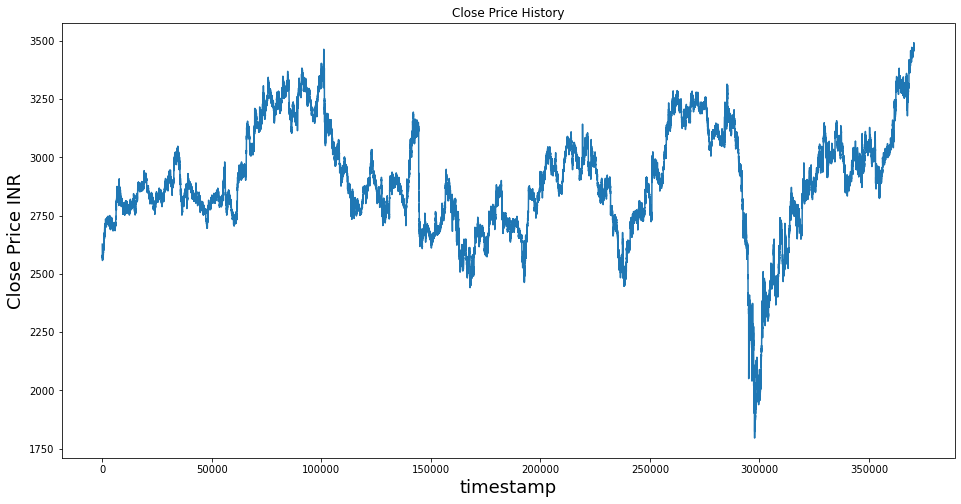

In [10]:
import seaborn as sns
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'])
#ax=sns.lineplot(data=df, x='timestamp',y='close', color="blue");
plt.xlabel('timestamp',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

In [11]:
data = df.filter(['close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.8) 

In [51]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data
dataset.shape

(370408, 1)

In [13]:
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [15]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [16]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.fit(x_train, y_train, batch_size=64, epochs=1)

4630/4630 [==============================] - 194s 41ms/step - loss: 2.0005e-04


In [19]:
test_data = scaled_data[training_data_len - 60: , : ]#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [20]:
x_test = np.array(x_test)

In [21]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [22]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)

In [23]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

9.716786364104092

C:\Users\Shaun\AppData\Local\Temp/ipykernel_16076/2702570860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  display['Predictions'] = predictions#Visualize the data


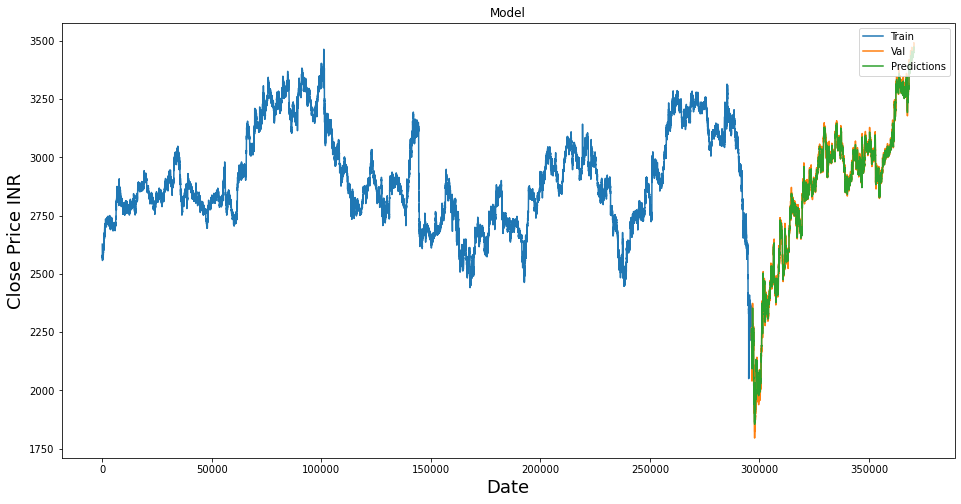

In [24]:
train = data[:training_data_len]
display = data[training_data_len:]
display['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['close'])
plt.plot(display['close'])
plt.plot(display['Predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [25]:
df

,timestamp,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,2640.15,2654.30,2617.55,2627.00,2235.0
1,2017-01-02 09:16:00+05:30,2627.00,2646.10,2612.35,2612.35,2806.0
2,2017-01-02 09:17:00+05:30,2614.45,2614.45,2591.30,2596.00,7443.0
3,2017-01-02 09:18:00+05:30,2596.00,2596.00,2587.75,2590.80,3289.0
4,2017-01-02 09:19:00+05:30,2593.00,2596.95,2584.00,2589.95,4862.0
...,...,...,...,...,...,...
370541,2021-01-01 15:25:00+05:30,3472.80,3475.85,3470.00,3470.05,2059.0
370542,2021-01-01 15:26:00+05:30,3470.05,3477.35,3469.15,3473.40,1991.0
370543,2021-01-01 15:27:00+05:30,3473.40,3475.00,3470.45,3470.45,1372.0
370544,2021-01-01 15:28:00+05:30,3470.45,3475.00,3470.00,3472.20,1442.0


In [ ]:
3,906.60
Open
3,890.00
High
3,920.00
Low
3,872.00

In [26]:
model.predict([3890.00,3920.00,3872.00,2,504.27])

ValueError: in user code:

    File "C:\Users\Shaun\anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Shaun\anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Shaun\anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Shaun\anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Users\Shaun\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Shaun\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=False
      • mask=None


In [30]:
x_test[0][0][0]

0.24725226154344826

In [62]:
test_data=np.array([3890.,3920.,3872.,3504.])

In [44]:
test_data

array([3890., 3920., 3872., 2504.])

In [52]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data_test = scaler.fit_transform(np.vstack(test_data))

In [53]:
scaled_data_test[0][0]

0.9788135593220337

In [42]:
dataset.shape

(370408, 1)

In [61]:
out=model.predict(scaled_data_test)
out =scaler.inverse_transform(out)
out

array([[2651.536 ],
       [2652.9106],
       [2650.711 ],
       [2588.3452]], dtype=float32)

In [56]:
# data_scaled = np.hstack(out)

In [57]:
data_scaled

array([0.10419197, 0.10516282, 0.10360941, 0.05956587], dtype=float32)

In [59]:
predictions

array([[2235.465 ],
       [2237.139 ],
       [2238.7866],
       ...,
       [3464.6138],
       [3463.7751],
       [3463.0627]], dtype=float32)

In [64]:
x_test.shape

(74081, 60, 1)